## Import Libraries

In [1]:
import matplotlib.pyplot as plt
from numpy import sin, cos, sqrt, pi, linspace, arange, deg2rad, rad2deg, array, arcsin, arccos,sort, argsort, argwhere, argmin, argmax, interp, concatenate, zeros
from scipy.spatial import distance
from numpy import linalg as LA
import warnings
warnings.simplefilter('ignore')

def sec(x):
    return 1/cos(x)
def tan(x):
    return sin(x)/cos(x)

## Initialize Parameters 

A   :  [2.         3.05327693 4.4       ]
B   :  [-2.         -3.05327693  4.4       ]
D1  :  [0 0 0]
D2  :  [-0.925     1.602147  0.      ]
D3  :  [-0.925    -1.602147  0.      ]
D4  :  [1.85 0.   0.  ]
AB  :  7.300000000000001
BD1 :  5.72 m
BD2 :  6.50 m
BD3 :  4.76 m
BD4 :  6.60 m 5.7168610268223246
Upper limit:  7.300000000000001 m


(-4.014995393301708, 4.014999780633414, -4.014989580089784, 4.014998354750561)

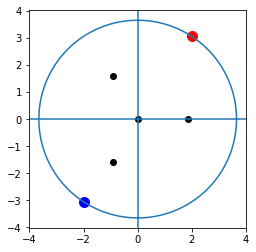

In [18]:
%matplotlib inline
n      = 1.33
c      = 299792458/n
h      = 4.5
Dia    = 7.3   #--------------------- diameter of tank
R      = 7.3/2 #--------------------- radius of tank
v      = n * c
times  = linspace(1e-12,1e-8,200000)

x1,y1,z1 = [ 2, sqrt(R**2-2**2),4.4] #----------------------------------------- Coordinates of particle at top tanker lid      #------PARAM
x2,y2,z2 = [-2, -sqrt(R**2-2**2),4.4] #-------------------- Calculate bottom y coordinate
#x1,y1,z1 = [ ,0, 4 ]
#x2,y2,z2 = [-R,0, 4 ]

A      = array([x1,y1,z1])
B      = array([x2,y2,z2])
D1     = array([0, 0, 0])                                #------ Central    PMT number 1 
D2     = array([1.85*cos(2*pi/3) , 1.85*sin(2*pi/3), 0]) #------ Non-Radial PMT number 2
D3     = array([1.85*cos(4*pi/3) , 1.85*sin(4*pi/3), 0]) #------ Non-Radial PMT number 3
D4     = array([1.85*cos(0)      , 1.85*sin(0     ), 0]) #------ Radial     PMT number 4

AB    = LA.norm(B-A)
BD1   = LA.norm(B-D1)
BD2   = LA.norm(B-D2)
BD3   = LA.norm(B-D3)
BD4   = LA.norm(B-D4)

limit     = AB 
print('A   : ', A)
print('B   : ', B)
print('D1  : ', D1)
print('D2  : ', D2)
print('D3  : ', D3)
print('D4  : ', D4)
print('AB  : ', AB)
print('BD1 :  %.2f m\nBD2 :  %.2f m\nBD3 :  %.2f m\nBD4 :  %.2f m'%(BD1,BD2,BD3,BD4), LA.norm(A-D1) )
print('Upper limit: ', limit, "m")

angs  = linspace(0,6.28,1000)
xs,ys = R*cos(angs), R*sin(angs)
plt.plot(xs,ys)
plt.scatter(x1,y1,c='r',s=100)      ; plt.scatter(x2,y2,c='b',s=100);
plt.scatter(D1[0],D1[1],c='k'); plt.scatter(D2[0],D2[1],c='k');
plt.scatter(D3[0],D3[1],c='k');plt.scatter(D4[0],D4[1],c='k')
plt.axhline(0)
plt.axvline(0)
plt.axis('scaled')

In [14]:
def entry_brightness(AD,alpha,c,v,den,A,B,D):
    return 1

def Atphi(x,y,color,mylabel):
    plt.plot(x, y, c=color, ls='-' , label=mylabel, lw=2)
def Btphi(x,y,color,mylabel):
    plt.plot(x, y, c=color, ls='-' , label=mylabel, lw=2)
def ABtphi(xa,ya,xb,yb,color,mylabel):
    plt.plot(xa, ya, c=color, ls='--' , label=mylabel, lw=2)
    plt.plot(xb, yb, c=color, ls='-'  , label=mylabel, lw=2)

def Atb(x,y,color,mylabel):
    plt.plot(x, y, c=color, ls='-' , label=mylabel, lw=2)
def Btb(x,y,color,mylabel):
    plt.plot(x, y, c=color, ls='-' , label=mylabel, lw=2)
def ABtb(xa,ya,xb,yb,color,mylabel):
    plt.plot(xa, ya, c=color, ls='--' , label=mylabel, lw=2)
    plt.plot(xb, yb, c=color, ls='-'  , label=mylabel, lw=2)

def Atx(x,y,color,mylabel):
    plt.plot(x, y, c=color, ls='-' , label=mylabel, lw=2)
def Btx(x,y,color,mylabel):
    plt.plot(x, y, c=color, ls='-' , label=mylabel, lw=2)
def ABtx(xa,ya,xb,yb,color,mylabel):
    plt.plot(xa, ya, c=color, ls='--' , label=mylabel, lw=2)
    plt.plot(xb, yb, c=color, ls='-'  , label=mylabel, lw=2)
    
def Aphib(x,y,color,mylabel):
    plt.plot(x, y, c=color, ls='-' , label=mylabel, lw=2)
def Bphib(x,y,color,mylabel):
    plt.plot(x, y, c=color, ls='-' , label=mylabel, lw=2)
def ABphib(xa,ya,xb,yb,color,mylabel):
    plt.plot(xa, ya, c=color, ls='--' , label=mylabel, lw=2)
    plt.plot(xb, yb, c=color, ls='-'  , label=mylabel, lw=2)


In [19]:
%matplotlib
#plt.figure(figsize=(15,12))

plotme='t vs x'

det_nums  = [1,2,3,4]
det_coors = [D1,D2,D3,D4]
colors    = ['k','r','b','g']
labels    = ['Central Detector', "Detector 2",'Detector 3','Detector 4']

for det_num, det_coor, color, mylabel in zip(det_nums, det_coors, colors, labels):
    
    print("Detector ", det_num, det_coor)
    print('A, B, D ==== ',A,B,det_coor)
    D  = det_coor
    AD = LA.norm(A-D)
    AB = LA.norm(A-B)
    alpha  = sum((A-D)*(A-B)) / (AD*AB)
    den    = c*c-v*v
    xc     = AD*cos(alpha) - sqrt(AD*AD*c*c*(c*c-v*v)*(cos(alpha)**2-1))/den
    print("xc:", xc)
    TT, XtoA, XtoB, BtoA, BtoB, PHItoA, PHItoB = [], [], [], [], [], [], []
    
    for iii,t in enumerate(times):
        x      = v*t
        r      = x/AB
        X      = array( [ (1-r)*A[0]+r*B[0], (1-r)*A[1]+r*B[1], (1-r)*A[2]+r*B[2] ] )
        AX     = x
        k      = sqrt(AD**2+AX**2-2*AD*AX*cos(alpha)) #LA.norm(D-X)
        tt     = t + k/c
        xtermA = c*c*tt*v - AD*v*v*cos(alpha) 
        xtermB = v*v*( (c*tt*v)**2 + (AD*v*cos(alpha))**2 + (AD*c)**2 - (AD*v)**2 - 2*c*c*AD*tt*v*cos(alpha) )
        vtermA = c*c*v**3*(tt*v - AD*cos(alpha))
        xa,xb  = (xtermA + sqrt(xtermB))/den , (xtermA - sqrt(xtermB))/den
        TT.append(tt)
        XtoA.append(xa)
        XtoB.append(xb)
        if ((iii+1)%20000==0):
            print(x,xa,xb,sep='\t')
        #    print(x,t,tt,xa,xb,Xa,Xb,sep='\t')#va,vb,ka,kb,phia,phib,sep='\t')
    

Using matplotlib backend: Qt5Agg
Detector  1 [0 0 0]
A, B, D ====  [2.         3.05327693 4.4       ] [-2.         -3.05327693  4.4       ] [0 0 0]
xc: 8.47615963883799
0.3000487818332092	0.30004878183327954	1.087942413048859
0.5998127594072971	0.5998127594074166	0.8091325249771698
0.8995767369813849	0.5053099072225111	0.8995767369813047
1.1993407145554729	0.17297433163202702	1.1993407145554142
1.499104692129561	-0.1918902237534721	1.4991046921295417
1.7988686697036487	-0.5938609071744549	1.7988686697036318
2.0986326472777366	-1.0381032798774594	2.09863264727772
2.3983966248518245	-1.5303661748493775	2.398396624851811
2.698160602425912	-2.076925363364214	2.6981606024258955
2.9979245800000003	-2.684454436455993	2.997924579999998
Detector  2 [-0.925     1.602147  0.      ]
A, B, D ====  [2.         3.05327693 4.4       ] [-2.         -3.05327693  4.4       ] [-0.925     1.602147  0.      ]
xc: 7.843550980962491
0.3000487818332092	0.30004878183321154	2.813018651862479
0.5998127594072971	0

KeyboardInterrupt: 

In [ ]:
argmin(TT)

In [ ]:
        va,vb  = (c*c*v + vtermA/sqrt(xtermB))/den, (c*c*v - vtermA/sqrt(xtermB))/den

        ra,rb  = xa/AB, xb/AB
        
        Xa     = array([ (1-ra)*A[0] + ra*B[0] , (1-ra)*A[1] + ra*B[1] , (1-ra)*A[2]+ra*B[2] ])
        Xb     = array([ (1-rb)*A[0] + rb*B[0] , (1-rb)*A[1] + rb*B[1] , (1-rb)*A[2]+rb*B[2] ])
        
        ka,kb  = LA.norm(D-Xa) , LA.norm(D-Xb)
        phia   = arccos ( sum((D-A)*(D-Xa)) / (AD*ka) )
        phib   = arccos ( sum((D-A)*(D-Xb)) / (AD*kb) )
        betaa  = arccos ( sum((D-Xa)*(B-Xa)) / (ka*LA.norm(B-Xa)) )
        betab  = arccos ( sum((D-Xb)*(B-Xb)) / (kb*LA.norm(B-Xb)) )
        
        vta      = va * sin(betaa)
        vtb      = vb * sin(betab)
        omegaa   = (vta / ka)
        omegab   = (vtb / kb)
        brighta  = abs(omegaa / (ka**2))
        brightb  = abs(omegab / (kb**2))
        
        XtoA.append(xa)
        XtoB.append(xb)
        BtoA.append(brighta)
        BtoB.append(brightb)
        PHItoA.append(rad2deg(phia))
        PHItoB.append(rad2deg(phib))
        TT.append(tt*1e9)
        
        #if ((iii+1)%20000==0):
        #    print(c,v,t,x,tt,sep='\t'
        #    print(x,t,tt,xa,xb,Xa,Xb,sep='\t')#va,vb,ka,kb,phia,phib,sep='\t')
        
    #rc  = xc/nAB
    #Xc  = array([ (1-rc)*A[0] + rc*B[0] , (1-rc)*A[1] + rc*B[1] , (1-rc)*A[2]+rc*B[2] ])
    #PHI = arccos( sum((D-Xc)*(D-A))  / (LA.norm(D-Xc)*LA.norm(D-A)) ) ; PHI = rad2deg(PHI)

    #print("PHI: ",round(rad2deg(PHI),2), "XC: ", round(xc,2))
    XtoA, XtoB, TT, BtoA, BtoB, PHItoA, PHItoB = array(XtoA), array(XtoB), array(TT), array(BtoA), array(BtoB), array(PHItoA), array(PHItoB)
        
    cona = [(XtoA>=0) & (XtoA<=AB)]
    conb = [(XtoB>=0) & (XtoB<=AB)]
    alen = len (XtoA[cona])
    blen = len (XtoB[conb])
    print(alen, blen)
    if det_num==1:
        den_bright = entry_brightness(AD,alpha,c,v,den,A,B,D)
    
    if alen == 0:
        if blen == 0:
            print("Images outside tank. Skipping...")
        else:
            print('Only image moving forward towards B. Processing...')
            TTb, XtoB, BtoB, PHItoB = TT[conb], XtoB[conb], BtoB[conb]/den_bright, PHItoB[conb]
            if   plotme=='b vs phi': Bphib (x=PHItoB, y=BtoB  , color=color, mylabel=mylabel)
            elif plotme=='t vs b'  : Btb   (x=TTb   , y=BtoB  , color=color, mylabel=mylabel)
            elif plotme=='t vs phi': Btphi (x=TTb   , y=PHItoB, color=color, mylabel=mylabel)
            elif plotme=='t vs x'  : Btx   (x=TTb   , y=XtoB  , color=color, mylabel=mylabel)
    
    elif alen != 0:
        if blen == 0:
            print('Only image moving back towards A. Processing...')
            TTa, XtoA, BtoA, PHItoA = TT[cona], XtoA[cona], BtoA[cona]/den_bright, PHItoA[cona]
            if   plotme=='b vs phi': Aphib  (x=PHItoA, y=BtoA  , color=color, mylabel=mylabel)
            elif plotme=='t vs b'  : Atb    (x=TTa   , y=BtoA  , color=color, mylabel=mylabel)
            elif plotme=='t vs phi': Atphi  (x=TTa   , y=PHItoA, color=color, mylabel=mylabel)
            elif plotme=='t vs x'  : Atx    (x=TTa   , y=XtoA  , color=color, mylabel=mylabel)
        else:
            print('Both images moving in both directions. Processing...')
            TTa,XtoA,BtoA,PHItoA = TT[cona],XtoA[cona],BtoA[cona]/den_bright,PHItoA[cona]
            TTb,XtoB,BtoB,PHItoB = TT[conb],XtoB[conb],BtoB[conb]/den_bright,PHItoB[conb]
            if   plotme=='b vs phi': ABphib  (xa=PHItoA, ya=BtoA  , xb=PHItoB, yb=BtoB  , color=color, mylabel=mylabel)
            elif plotme=='t vs b'  : ABtb    (xa=TTa   , ya=BtoA  , xb=TTb   , yb=BtoB  , color=color, mylabel=mylabel)
            elif plotme=='t vs phi': ABtphi  (xa=TTa   , ya=PHItoA, xb=TTb   , yb=PHItoB, color=color, mylabel=mylabel)
            elif plotme=='t vs x'  : ABtx    (xa=TTa   , ya=XtoA  , xb=TTb   , yb=XtoB  , color=color, mylabel=mylabel)
   # break
plt.legend() #loc='upper right', prop={'size': 14})
plt.tick_params(axis='both', direction='in', labelsize=18)
plt.show()